In [1]:
import numpy as np

In [83]:
def normalize(X):
    return (X - X.mean(axis=0))/X.std(axis =0)

In [92]:
def PCA(X:np.ndarray, k) -> np.ndarray:
    X = normalize(X)
    X_centered = X - X.mean()
    C = X_centered.T @ X_centered / (X.shape[0] - 1)
    values, vectors = np.linalg.eig(C)
    PC = np.zeros((k, X.shape[1]))
    for i in range(k) :
        best_val = np.argmax(np.abs(values))
        sign = np.sign(vectors[best_val])
        PC[i] = vectors[best_val, :]
        values[best_val] = 0
    return PC
    
        

In [93]:
import seaborn as sns 
data = sns.load_dataset("iris")
X = np.array(data.drop(["species"], axis = 1))
y = np.array(data["species"])
label_map = {'setosa':0, 'versicolor':1, 'virginica':2}
y = np.array([label_map[label] for label in y])

In [94]:
PC = PCA(X, 2)

In [95]:
PC

array([[ 0.52106591, -0.37741762, -0.71956635,  0.26128628],
       [-0.26934744, -0.92329566,  0.24438178, -0.12350962]])

In [96]:
X_reduced = X @ PC.T

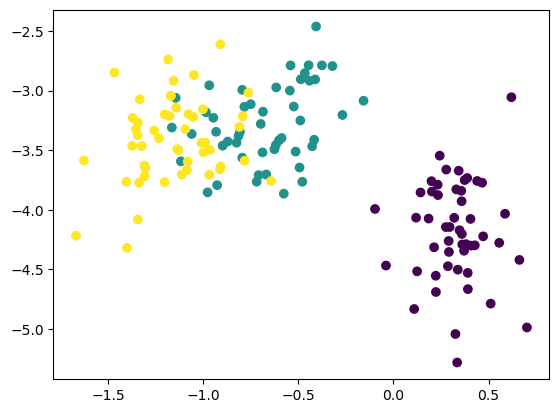

In [97]:
import matplotlib.pyplot as plt

plt.scatter(X_reduced[:,0], X_reduced[:,1], c= y)

In [98]:
PC3 = PCA(X, 3)

X_reduced3 = X @ PC3.T

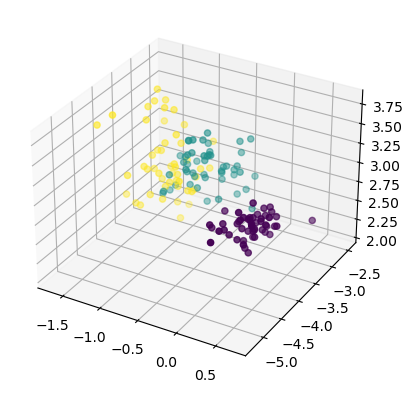

In [99]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

ax.scatter(X_reduced3[:, 0],X_reduced3[:, 1], X_reduced3[:, 2],c = y)